In [1]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# functions

In [2]:
def compute_RMSE(diff):
    if len(diff)>0:
        return np.sqrt(np.mean(diff.values**2))
        
def compute_MAE(diff):
    if len(diff)>0:
        return np.mean(np.abs(diff.values))

def plot_errors(train_data,test_data):
    test_diff = test_data['outofsample_error']
    train_diff = train_data['insample_error']
    
    test_plot = test_data[['date','spot_price','rho','v0']].copy()
    test_plot = test_plot.reset_index().set_index('date')
    test_plot['MAE'] = test_diff.resample('D').apply(compute_RMSE)
    test_plot['RMSE'] = test_diff.resample('D').apply(compute_RMSE)
    test_plot = test_plot.reset_index()
    test_plot = test_plot.drop_duplicates(subset=['date'],keep='last').set_index('date').drop(columns='calculation_date')
    
    train_plot = train_data[['date','spot_price','rho','v0']].copy()
    train_plot = train_plot.reset_index().set_index('date')
    train_plot['MAE'] = train_diff.resample('D').apply(compute_RMSE)
    train_plot['RMSE'] = train_diff.resample('D').apply(compute_RMSE)
    train_plot = train_plot.reset_index()
    train_plot = train_plot.drop_duplicates(subset=['date'],keep='last').set_index('date').drop(columns='calculation_date')

    
    trainx = pd.date_range(start=min(train_data.index),end=max(train_data.index),periods=train_plot.shape[0])
    testx = pd.date_range(start=min(test_data.index),end=max(test_data.index),periods=test_plot.shape[0])

    train_plot.index = trainx
    test_plot.index = testx
    
    
    fig,axs = plt.subplots(max(len(train_plot.columns),len(test_plot.columns)),figsize=(10,10),sharex=True)
    for i,col in enumerate(train_plot.columns):
        axs[i].plot(train_plot[col],color='green',label='in-sample')
        axs[i].set_title(col.replace('_',' '))
        axs[i].legend()
    for i,col in enumerate(test_plot.columns):
        axs[i].plot(test_plot[col],color='purple',label='out-of-sample')
        axs[i].set_title(col.replace('_',' '))
        axs[i].legend()
    plt.show()

# loading model

In [3]:
from model_settings import ms
root = Path().resolve().parent.parent
models_dir = os.path.join(root,ms.trained_models)
models = pd.Series([f for f in os.listdir(models_dir) if f.find('.')==-1])
for i,m in enumerate(models):
    print(f"{i}     {m}")

0     2024-11-08 180048237415 cboe spx relative asian
1     2024-11-08 180746925336 cboe spx relative barrier
2     2024_11_01 204910611379 bloomberg barriers
3     2024_11_01 205356527985 bloomberg asians
4     2024_11_05 184958719691 Oosterlee test


In [4]:
selected_model = models.iloc[0]
model_dir = os.path.join(models_dir,selected_model)
pickle = [f for f in os.listdir(model_dir) if f.endswith('.pkl')][0]
picke_dir = os.path.join(model_dir,pickle)
model = joblib.load(picke_dir)
model

{'seed': 1312,
 'raw_data':         spot_price  strike_price  days_to_maturity  n_fixings  \
 0           2779.0       1389.00                 7        1.0   
 1           2779.0       1389.00                 7        1.0   
 2           2779.0       1389.00                 7        1.0   
 3           2779.0       1389.00                 7        1.0   
 4           2779.0       2083.75                 7        1.0   
 ...            ...           ...               ...        ...   
 138595      5857.0       7320.75                84        1.0   
 138596      5857.0       8785.00                84        1.0   
 138597      5857.0       8785.00                84        1.0   
 138598      5857.0       8785.00                84        1.0   
 138599      5857.0       8785.00                84        1.0   
 
         fixing_frequency  past_fixings averaging_type     w  risk_free_rate  \
 0                      7             0      geometric  call        0.023002   
 1                 

In [5]:
model['train_data']

,spot_price,strike_price,days_to_maturity,n_fixings,fixing_frequency,past_fixings,averaging_type,w,risk_free_rate,dividend_rate,...,eta,v0,date,asian_price,relative_spot,relative_asian_price,relative_observed,insample_target,insample_prediction,insample_error
0,2779.0,1389.00,7,1.0,7,0,geometric,call,0.023002,0.020042,...,0.551406,0.032300,2019-05-29,1389.385913,2.000720,0.985930,0.985930,0.985930,1.000492,0.014562
115,2779.0,3473.25,84,1.0,84,0,arithmetic,put,0.023002,0.020042,...,0.551406,0.032300,2019-05-29,689.666977,0.800115,0.198823,0.198823,0.198823,0.201750,0.002928
116,2779.0,4168.00,84,1.0,84,0,geometric,call,0.023002,0.020042,...,0.551406,0.032300,2019-05-29,0.000000,0.666747,0.000000,0.000000,0.000000,0.001899,0.001899
117,2779.0,4168.00,84,1.0,84,0,geometric,put,0.023002,0.020042,...,0.551406,0.032300,2019-05-29,1382.512064,0.666747,0.329459,0.329459,0.329459,0.331417,0.001958
118,2779.0,4168.00,84,1.0,84,0,arithmetic,call,0.023002,0.020042,...,0.551406,0.032300,2019-05-29,0.000000,0.666747,0.000000,0.000000,0.000000,0.002147,0.002147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45781,3893.0,1946.00,84,12.0,7,0,geometric,put,0.000659,0.015162,...,0.959426,0.021816,2021-03-01,0.000000,2.000514,0.000000,0.000000,0.000000,0.001318,0.001318
45782,3893.0,1946.00,84,12.0,7,0,arithmetic,call,0.000659,0.015162,...,0.959426,0.021816,2021-03-01,1939.143436,2.000514,1.013264,1.013264,1.013264,0.996426,-0.016838
45783,3893.0,1946.00,84,12.0,7,0,arithmetic,put,0.000659,0.015162,...,0.959426,0.021816,2021-03-01,0.000000,2.000514,0.000000,0.000000,0.000000,0.001631,0.001631
45785,3893.0,2919.25,84,12.0,7,0,geometric,put,0.000659,0.015162,...,0.959426,0.021816,2021-03-01,0.618147,1.333562,0.000212,0.000212,0.000212,0.001471,0.001260


In [6]:
print('model attributes:\n')
for k in model.keys():
    print(k)

model attributes:

seed
raw_data
dataset
target_name
excluded_features
numerical_features
categorical_features
feature_set
n_features
development_dates
test_dates
train_data
test_data
train_X
train_y
test_X
test_y
preprocessor
pipeline
model
model_fit
dnn_runtime
numerical_scaler
dnn_params
transformers
regressor
dnn_pipeline


In [7]:
for col in model['feature_set']:
    print(f"{col.replace("_"," ")}:",f"\n{model['test_data'][col].copy().squeeze().sort_values().drop_duplicates().reset_index(drop=True)}\n")
print()

days to maturity: 
0     7
1    28
2    84
Name: days_to_maturity, dtype: int64

fixing frequency: 
0     7
1    28
2    84
Name: fixing_frequency, dtype: int64

past fixings: 
0    0
Name: past_fixings, dtype: int64

risk free rate: 
0      0.000330
1      0.000355
2      0.000380
3      0.000406
4      0.000431
         ...   
308    0.054494
309    0.054500
310    0.054513
311    0.054801
312    0.054889
Name: risk_free_rate, Length: 313, dtype: float64

dividend rate: 
0      0.012624
1      0.012628
2      0.012641
3      0.012671
4      0.012687
         ...   
344    0.018021
345    0.018067
346    0.018212
347    0.018300
348    0.018494
Name: dividend_rate, Length: 349, dtype: float64

kappa: 
0      3.553361e-10
1      3.573693e-09
2      6.275163e-09
3      1.376649e-08
4      1.761361e-08
           ...     
510    4.023112e+01
511    4.676727e+01
512    5.110843e+01
513    6.214923e+01
514    8.814194e+01
Name: kappa, Length: 515, dtype: float64

theta: 
0      8.181674e-1

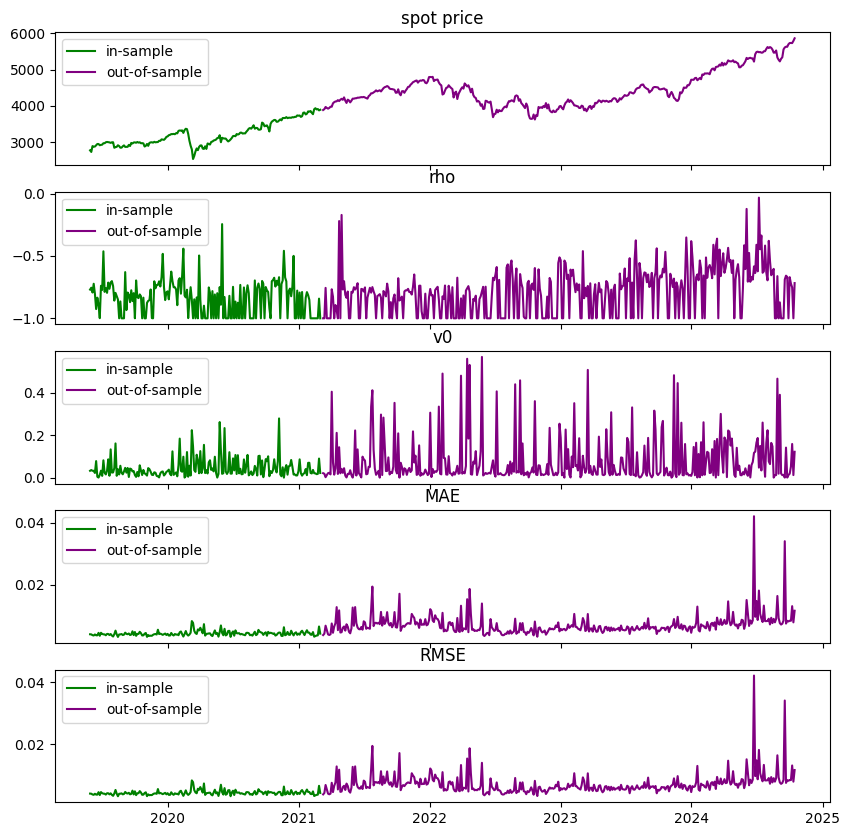

In [8]:
train_data = model['train_data'].copy()
test_data = model['test_data'].copy()
train_data['calculation_date'] = pd.to_datetime(train_data['calculation_date'],format='mixed')
test_data['calculation_date'] = pd.to_datetime(test_data['calculation_date'],format='mixed')
test_data = test_data.set_index('calculation_date').sort_index()
train_data = train_data.set_index('calculation_date').sort_index()
plot_errors(train_data,test_data)

# retraining

In [9]:
from convsklearn import convsklearn
help(convsklearn)

Help on class convsklearn in module convsklearn.convsklearn:

class convsklearn(builtins.object)
 |  convsklearn(target_name='observed_price', excluded_features=['barrier_price', 'asian_price', 'observed_price', 'outin', 'updown', 'n_fixings'], seed=1312)
 |
 |  a proprietary class of convenience wrappers for sklearn
 |
 |  Methods defined here:
 |
 |  __init__(self, target_name='observed_price', excluded_features=['barrier_price', 'asian_price', 'observed_price', 'outin', 'updown', 'n_fixings'], seed=1312)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  load_data(self, data)
 |
 |  preprocess_data(self, development_dates, test_dates, plot=True)
 |
 |  run_dnn(self, print_details=True)
 |
 |  test_prediction_accuracy(self)
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references to the object




training on 53460 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 7.56909441947937

in sample:
     RMSE: 0.0010219112131620658
     MAE: 0.0006912121347382381

out of sample:
     RMSE: 0.01073344596736594
     MAE: 0.006283507734270654


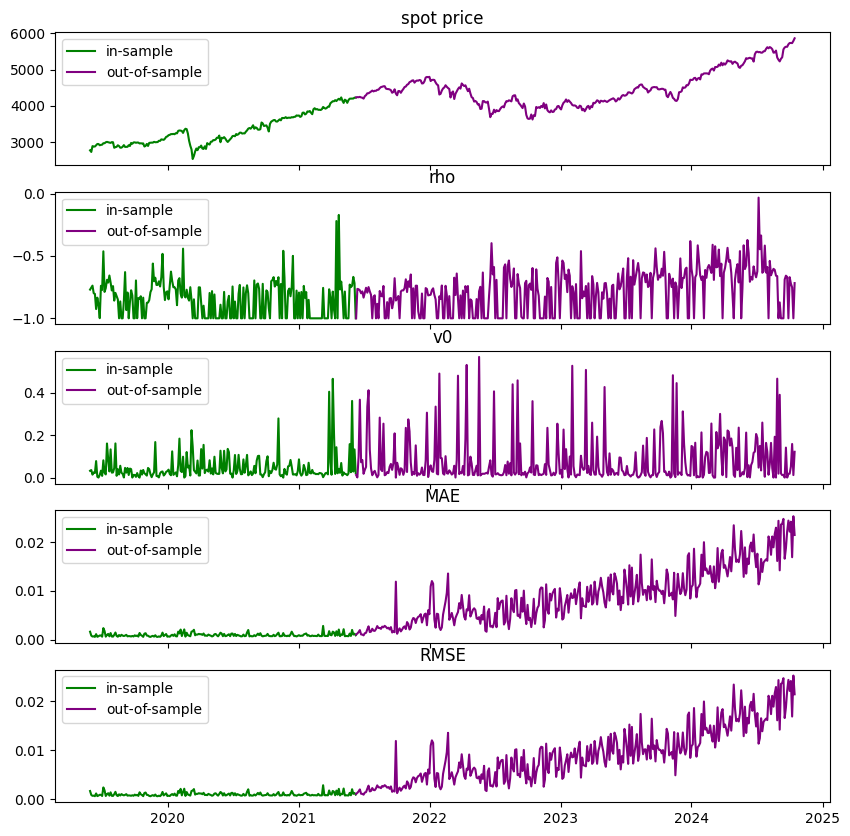



training on 61560 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 10.15702509880066

in sample:
     RMSE: 0.0010127731412637668
     MAE: 0.0006967043769468309

out of sample:
     RMSE: 0.006861480692697212
     MAE: 0.004035787598252871


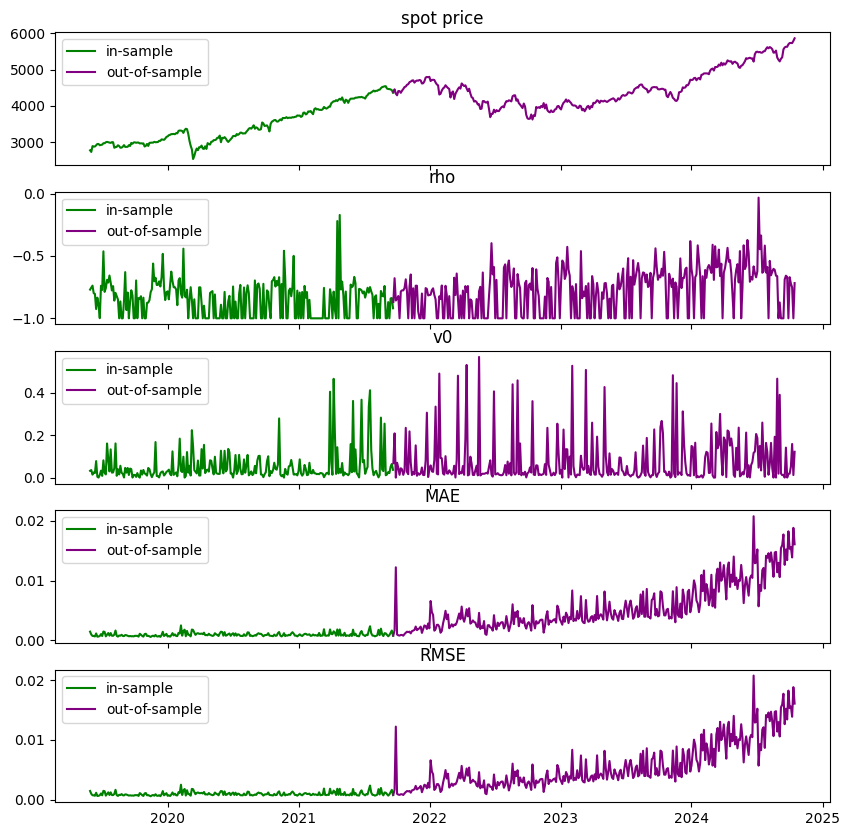



training on 68940 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 11.360161304473877

in sample:
     RMSE: 0.0008283593081183745
     MAE: 0.0005668662184492946

out of sample:
     RMSE: 0.005677874009030405
     MAE: 0.0029989541046815623


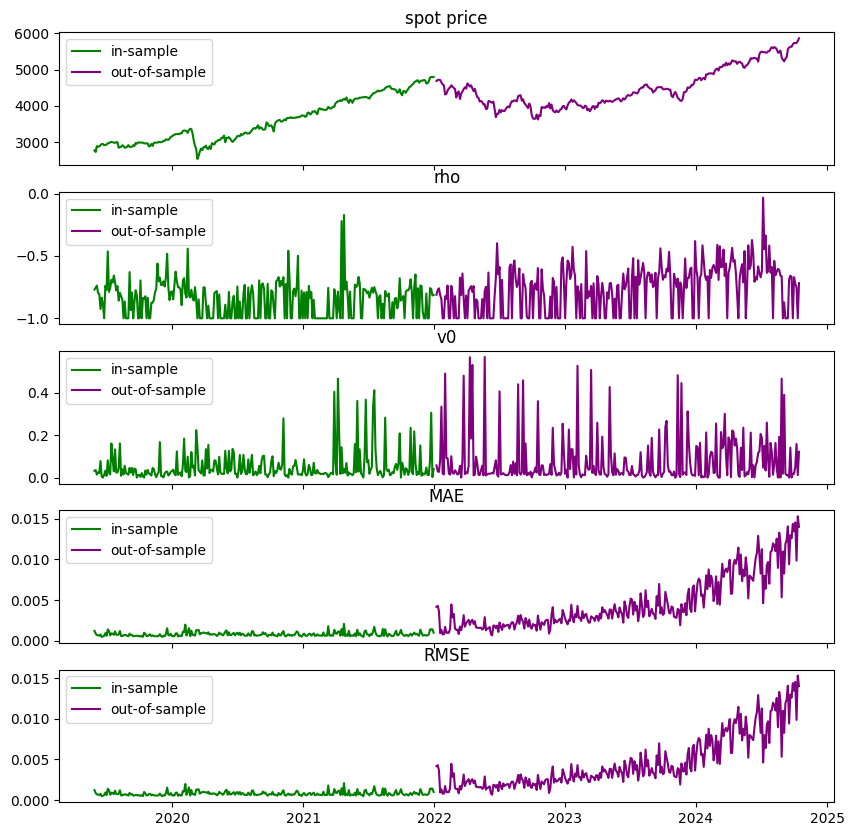



training on 76140 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 12.607097864151001

in sample:
     RMSE: 0.0007134134717052571
     MAE: 0.00047393294272208235

out of sample:
     RMSE: 0.002234463562425465
     MAE: 0.0011562051334034964


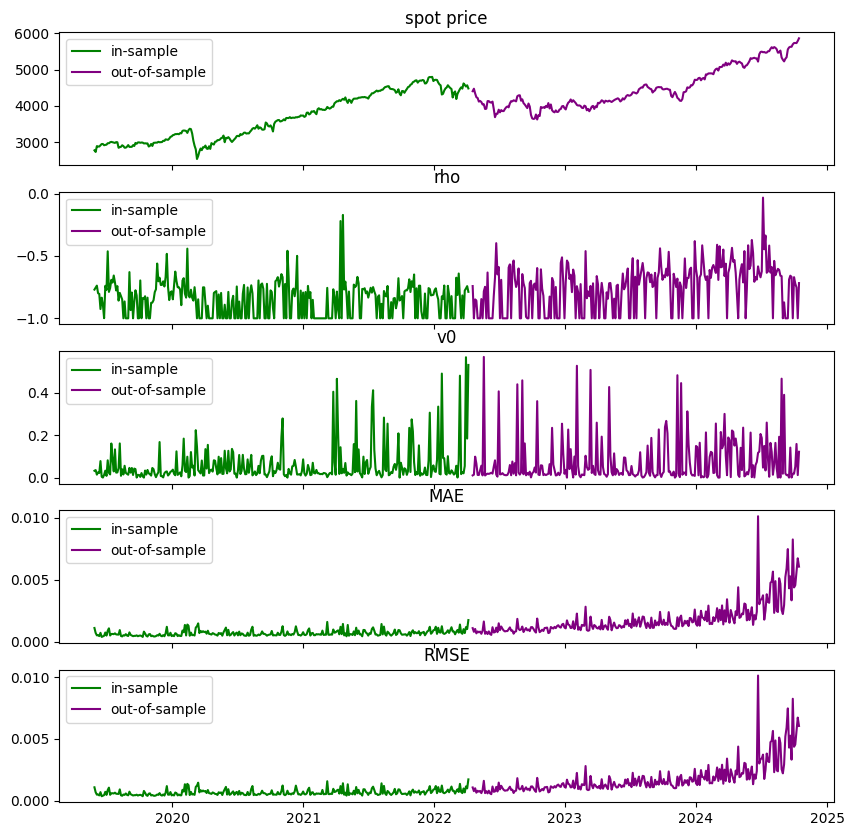



training on 83520 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 13.696157455444336

in sample:
     RMSE: 0.0006806428653742499
     MAE: 0.00044711481708071453

out of sample:
     RMSE: 0.0020458972531323533
     MAE: 0.0010431629702490875


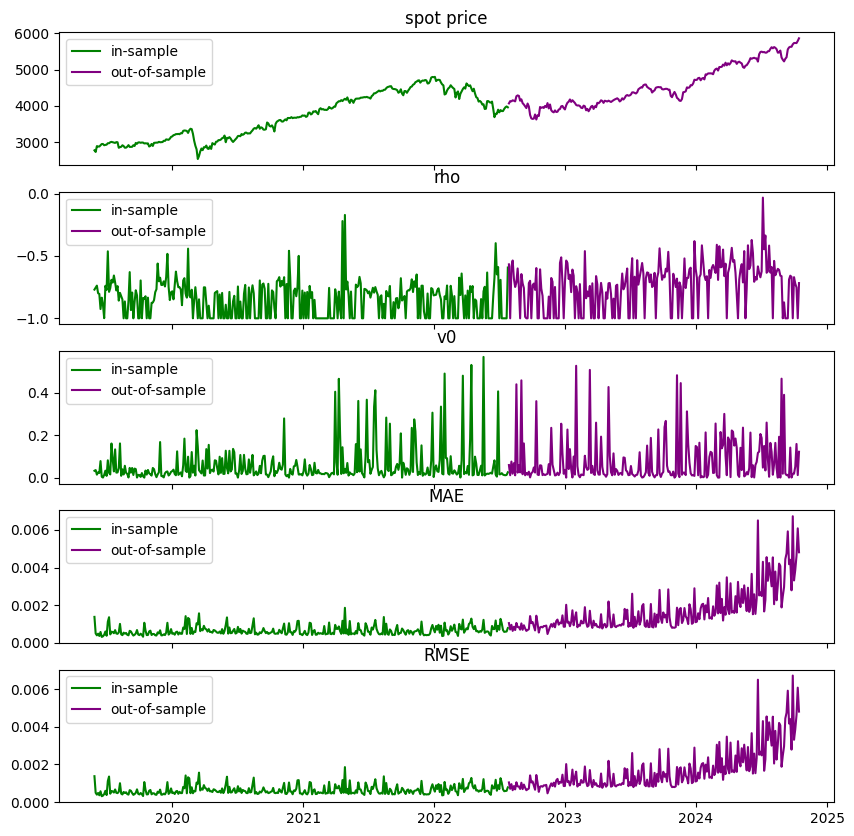



training on 89460 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 14.456658601760864

in sample:
     RMSE: 0.000847187488436362
     MAE: 0.0005899841804391337

out of sample:
     RMSE: 0.001576277819473147
     MAE: 0.000982348034900729


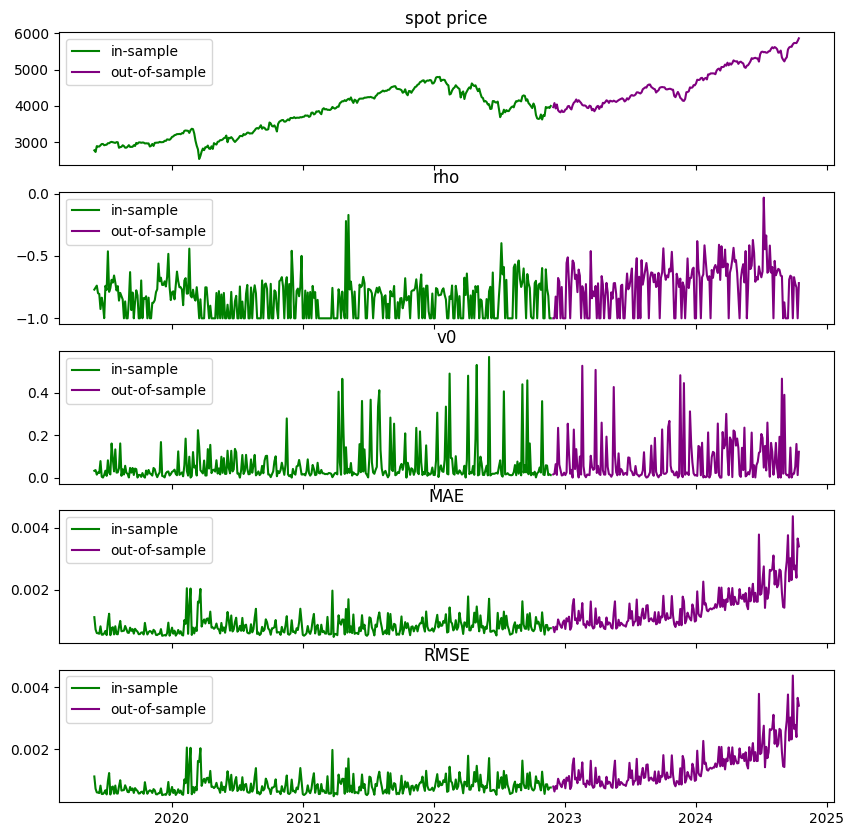



training on 97200 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 15.968860387802124

in sample:
     RMSE: 0.0008242425111981112
     MAE: 0.0005622644976097464

out of sample:
     RMSE: 0.0019399318445172335
     MAE: 0.0010779124379844765


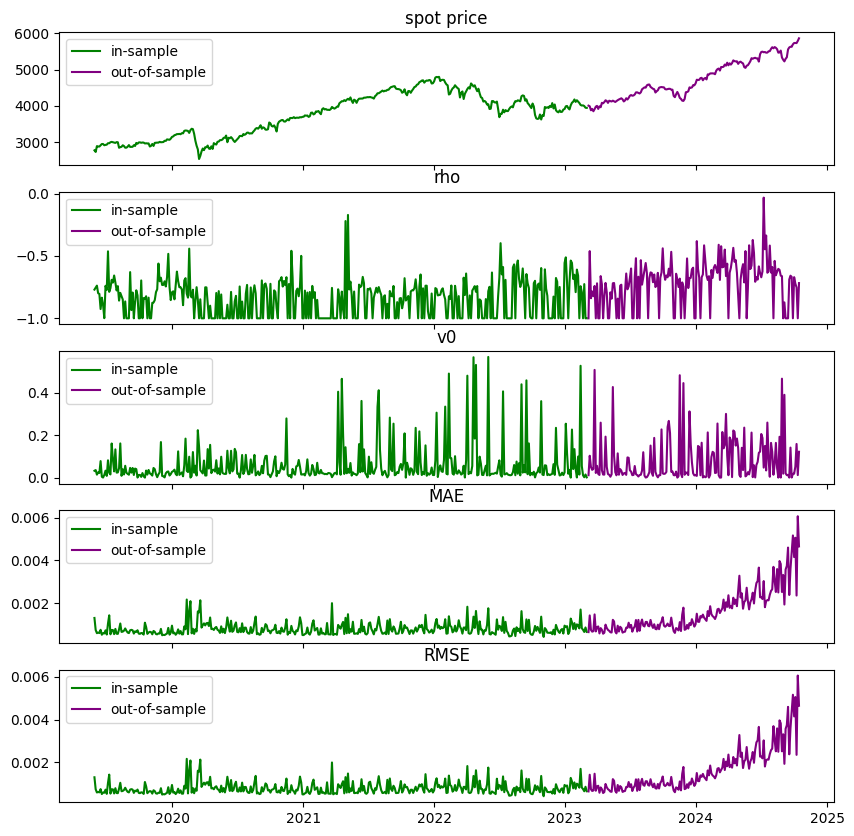



training on 104040 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 17.358901023864746

in sample:
     RMSE: 0.0005174775339532737
     MAE: 0.00035475511894982585

out of sample:
     RMSE: 0.0015227738266672649
     MAE: 0.0006680165137314706


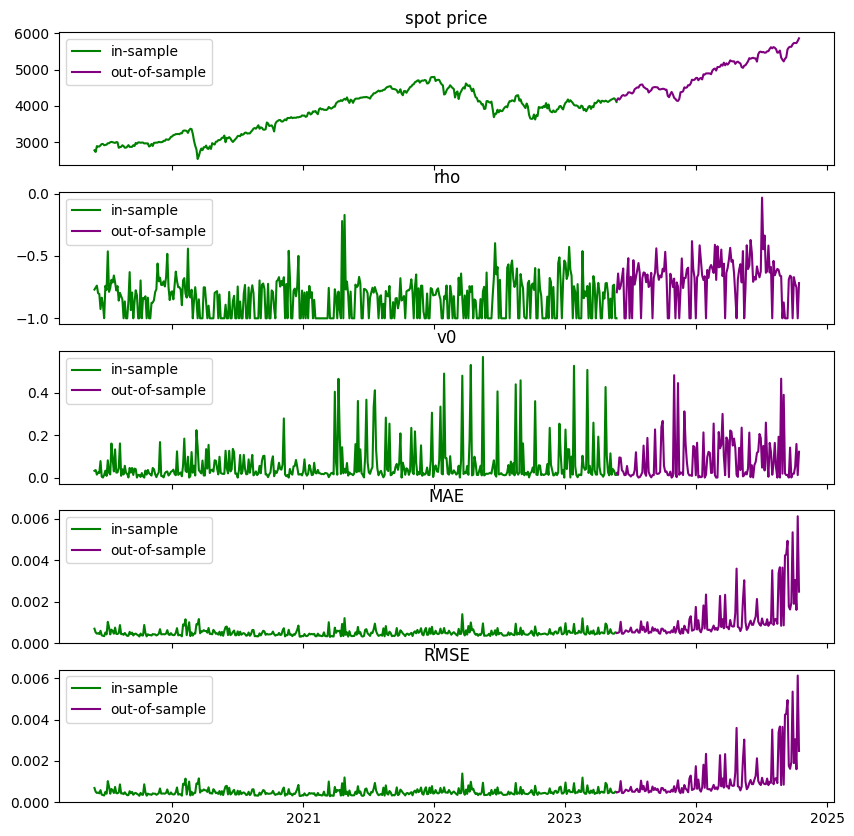



training on 111420 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 18.63351607322693

in sample:
     RMSE: 0.0007819618658775106
     MAE: 0.0005325220553512843

out of sample:
     RMSE: 0.0013723912366681967
     MAE: 0.0008162171234922766


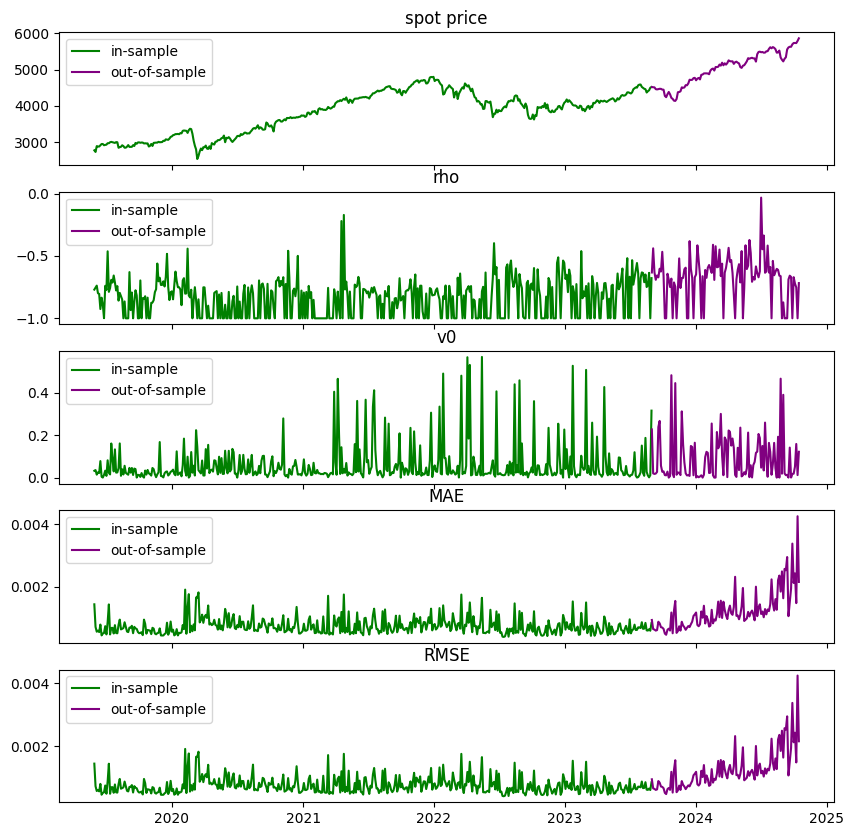



training on 118620 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 19.64426875114441

in sample:
     RMSE: 0.0006755450797430144
     MAE: 0.0004761432780554504

out of sample:
     RMSE: 0.0014609524761494388
     MAE: 0.0008523650286057084


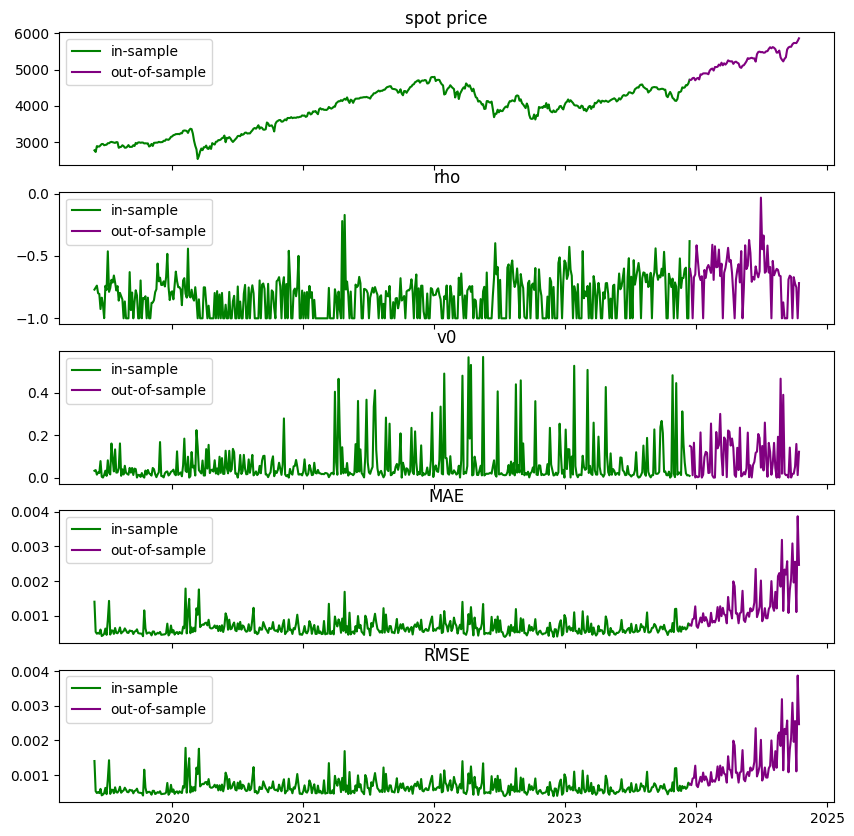



training on 126540 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 21.184109687805176

in sample:
     RMSE: 0.0006879053932472276
     MAE: 0.0004645832966795182

out of sample:
     RMSE: 0.0010233922564084495
     MAE: 0.0006886992472136418


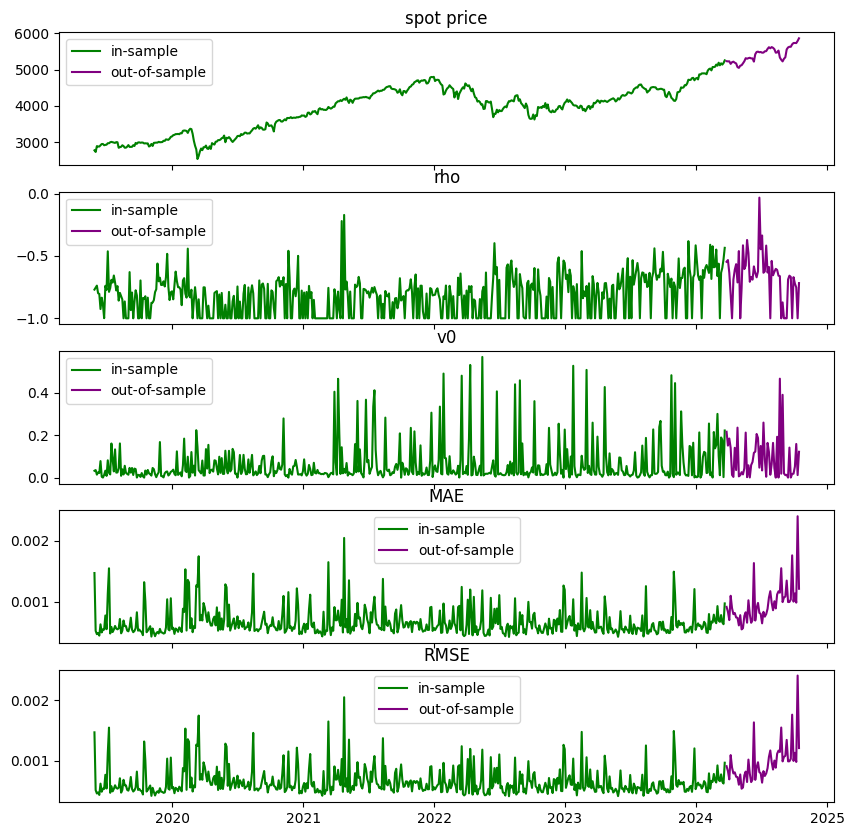



training on 133020 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 21.544552326202393

in sample:
     RMSE: 0.0007793271288087221
     MAE: 0.0005366726338208251

out of sample:
     RMSE: 0.00173865125932311
     MAE: 0.0009673194347471107


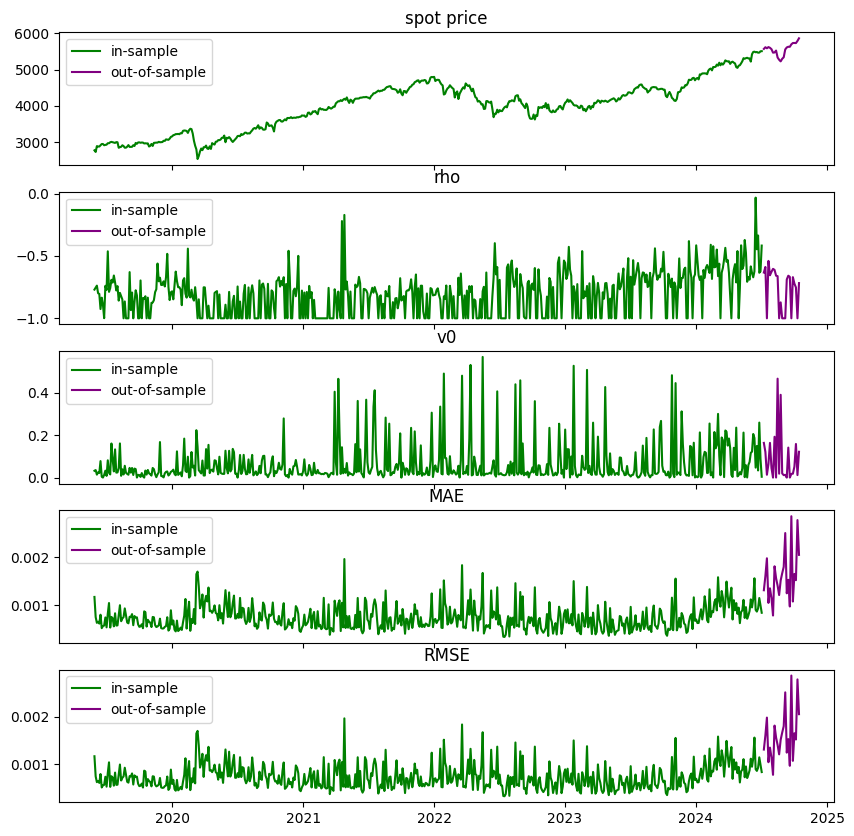



training on 138600 samples...

alpha: 0.01
hidden_layer_sizes: (17, 17)
learning_rate: adaptive
learning_rate_init: 0.1
solver: sgd
early_stopping: False
max_iter: 500
warm_start: True
tol: 0.0001
random_state: 1312
cpu: 22.683245182037354


In [10]:
retraining_frequency = 30 #days
test_dates = model['test_dates']
full_dataset = model['dataset']
models = {}
for i, date in enumerate(test_dates):
    development_dates = pd.concat([model['development_dates'],test_dates[:(i+1)*retraining_frequency]])
    subset_test_dates = test_dates[~test_dates.isin(development_dates)]
    if development_dates.shape == 0:
        break
    try:
        retrainer = convsklearn()
        retrainer.exluded_features = model['excluded_features']
        retrainer.target_name = model['target_name']
        retrainer.load_data(full_dataset)
        retrainer.preprocess_data(development_dates, subset_test_dates,plot=False)
        retrainer.run_dnn()
        retrainer.test_prediction_accuracy()
        models[date] = retrainer.__dict__
        plot_errors(retrainer.train_data.set_index('calculation_date'),retrainer.test_data.set_index('calculation_date'))
        print()
    except Exception as e:
        if str(e).find('Found array with 0 sample(s)')==-1:
            print(e)
        break

In [11]:
pd.concat([model['development_dates'],model['test_dates']])

0        2019-05-29
180      2019-06-03
360      2019-06-10
720      2019-06-12
1080     2019-06-14
            ...    
137520   2024-09-24
137700   2024-10-07
137880   2024-10-08
138060   2024-10-09
138240   2024-10-14
Name: date, Length: 575, dtype: datetime64[ns]

In [12]:
for k,m in models.items():
    print(k)
    print(m['test_data'].iloc[:,-4:].describe())
    print()
    print('%'*20)

2021-03-09 00:00:00
       relative_observed  outofsample_target  outofsample_prediction  \
count       85140.000000        85140.000000            85140.000000   
mean            0.189307            0.189307                0.190992   
std             0.299840            0.299840                0.292652   
min             0.000000            0.000000                0.000000   
25%             0.000000            0.000000                0.005654   
50%             0.014116            0.014116                0.021735   
75%             0.329742            0.329742                0.328759   
max             1.035671            1.035671                1.035540   

       outofsample_error  
count       85140.000000  
mean            0.001684  
std             0.010601  
min            -0.085464  
25%             0.000000  
50%             0.002447  
75%             0.006489  
max             0.054524  

%%%%%%%%%%%%%%%%%%%%
2021-03-10 00:00:00
       relative_observed  outofsample_target  

In [34]:
retraining_dates = [d for d in models.keys()]
cols = ['cpu','isMAE','isRMSE','osMAE','osRMSE']
df = pd.DataFrame(np.tile(np.nan,(len(retraining_dates),len(cols))),columns=cols,index=retraining_dates)

for i,row in df.iterrows():
    m = models[i]
    df.at[i,'cpu'] = m['dnn_runtime']
    df.at[i,'isMAE'] = compute_MAE(m['train_data']['insample_error'])
    df.at[i,'isRMSE'] = compute_RMSE(m['train_data']['insample_error'])
    df.at[i,'osMAE'] = compute_MAE(m['test_data']['outofsample_error'])
    df.at[i,'osRMSE'] = compute_RMSE(m['test_data']['outofsample_error'])


print(df)

                  cpu     isMAE    isRMSE     osMAE    osRMSE
2021-03-09   7.569094  0.000691  0.001022  0.006284  0.010733
2021-03-10  10.157025  0.000697  0.001013  0.004036  0.006861
2021-03-16  11.360161  0.000567  0.000828  0.002999  0.005678
2021-03-17  12.607098  0.000474  0.000713  0.001156  0.002234
2021-03-19  13.696157  0.000447  0.000681  0.001043  0.002046
2021-03-23  14.456659  0.000590  0.000847  0.000982  0.001576
2021-03-29  15.968860  0.000562  0.000824  0.001078  0.001940
2021-03-31  17.358901  0.000355  0.000517  0.000668  0.001523
2021-04-07  18.633516  0.000533  0.000782  0.000816  0.001372
2021-04-09  19.644269  0.000476  0.000676  0.000852  0.001461
2021-04-12  21.184110  0.000465  0.000688  0.000689  0.001023
2021-04-14  21.544552  0.000537  0.000779  0.000967  0.001739
